In [1]:
# 引入python库
import mne
import os
from mne.datasets import sample
import matplotlib.pyplot as plt
import numpy as np
# sample的存放地址
data_path = sample.data_path()
# 该fif文件存放地址
# fname = 'data\sub-001\sub-001_ses-01_task-AversiveLearningReplay_run-localiser_proc_ICA-epo.fif.gz'

class fname():
    def __init__(self, fname):
        self.fname = fname
        self.epochs = self.get_epochs()
    def get_fname(sub):
        fname = 'data\sub-{0}\sub-{0}_ses-01_task-AversiveLearningReplay_run-localiser_proc_ICA-epo.fif.gz'.format(str(sub).zfill(3))
        return fname
    def get_epochs(sub):
        # 读取epochs文件
        epochs = mne.read_epochs(fname.get_fname(sub))
        return epochs


# epochs = mne.read_epochs(fname.get_fname(sub=1))
# picks = mne.pick_types(epochs.info, meg=True, ref_meg=False, exclude='bads')

# epochs.plot(block=True)

# epochs.plot_drop_log()

# #SSP矢量图
# #epochs.plot_projs_topomap()
# plt.show()'

In [40]:

sti=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]                     
for stimuli in range (1,15):
    epochs_standard = fname.get_epochs(sub=1)
    for sub in [sub for sub in range (2,29) if sub not in [6, 12, 14 ,23]]:
        if sub == 1:
            epochs_standard = fname.get_epochs(sub=1)
        else:
            epochs = fname.get_epochs(sub)['stimulus_{}'.format(2*stimuli)]
            epochs.info['dev_head_t'] = epochs_standard.info['dev_head_t']
            epochs_standard = mne.concatenate_epochs([epochs_standard['stimulus_{}'.format(2*stimuli)], epochs['stimulus_{}'.format(2*stimuli)]])
    exec('evoked_{} = epochs_standard.average()'.format(stimuli))
        # evoked_standard = mne.concatenate_epochs([evoked_standard, evoked])


Reading e:\Proj\MT_ML_Decoding\CNN\data\sub-001\sub-001_ses-01_task-AversiveLearningReplay_run-localiser_proc_ICA-epo.fif.gz ...
    Read 5 compensation matrices
    Found the data of interest:
        t =    -500.00 ...     790.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Reading e:\Proj\MT_ML_Decoding\CNN\data\sub-002\sub-002_ses-01_task-AversiveLearningReplay_run-localiser_proc_ICA-epo.fif.gz ...
    Read 5 compensation matrices
    Found the data of interest:
        t =    -500.00 ...     790.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Reading e:\Proj\MT_ML_Decoding\CNN\data\sub-003\sub-003_ses-01_task-Aver

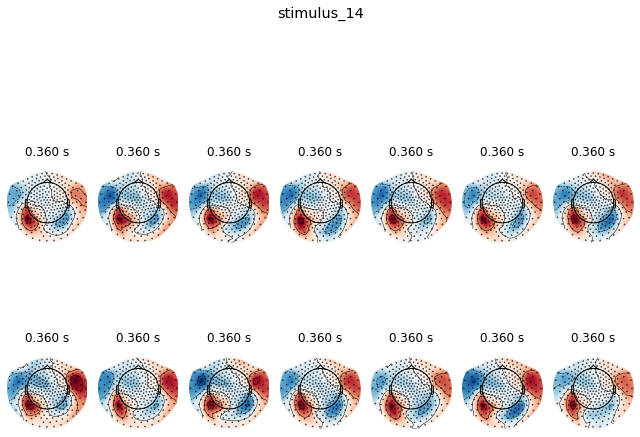

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(9, 8),
                        subplot_kw={'xticks': [], 'yticks': []})
for ax, st in zip(axs.flat, sti):
    exec('evo = evoked_{}.copy()'.format(st))
    evo.plot_topomap(times=(0.36), extrapolate='local',colorbar = False, res=1000, contours=4,size=2,show=False,axes=ax,title ='stimulus_{}'.format(stimuli))
    # plt.savefig('data/topomap/topomap-{}.png'.format(stimuli), dpi=600)
    # print(sub, stimuli)
plt.tight_layout()
plt.savefig('data/topomap/topomap-0.36.png', dpi=600)
plt.show()   
    

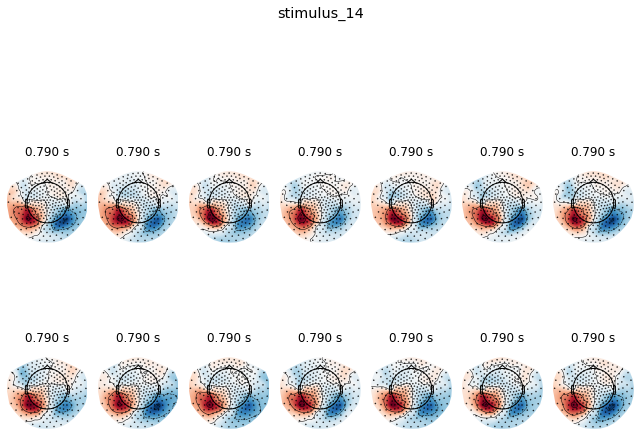

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(9, 8),
                        subplot_kw={'xticks': [], 'yticks': []})
for ax, st in zip(axs.flat, sti):
    exec('evo = evoked_{}.copy()'.format(st))
    evo.plot_topomap(times=(0.79), extrapolate='local',colorbar = False, res=1000, contours=4,size=2,show=False,axes=ax,title ='0.790s')
    # plt.savefig('data/topomap/topomap-{}.png'.format(stimuli), dpi=600)
    # print(sub, stimuli)
plt.tight_layout()
plt.savefig('data/topomap/topomap-0.79.png', dpi=600)
plt.show()   
    

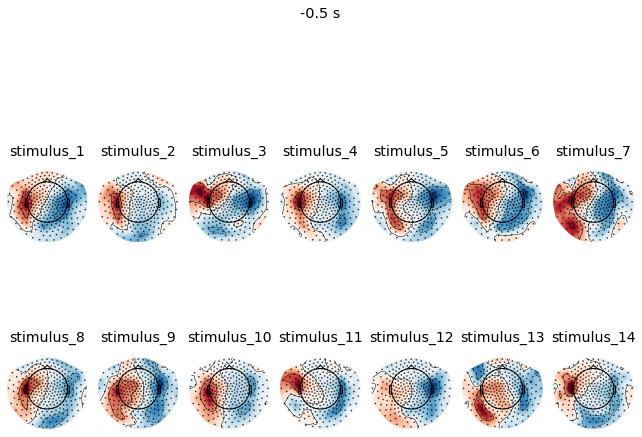

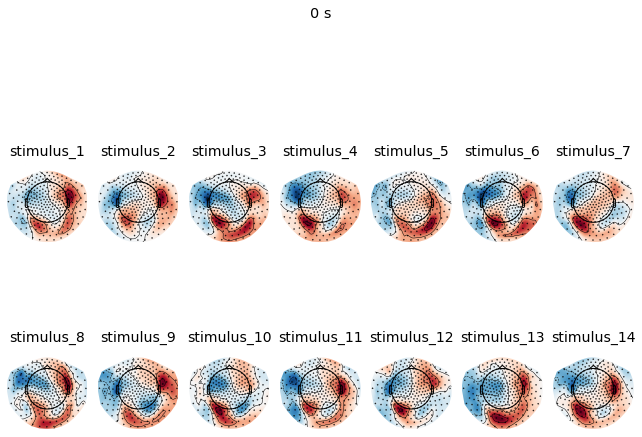

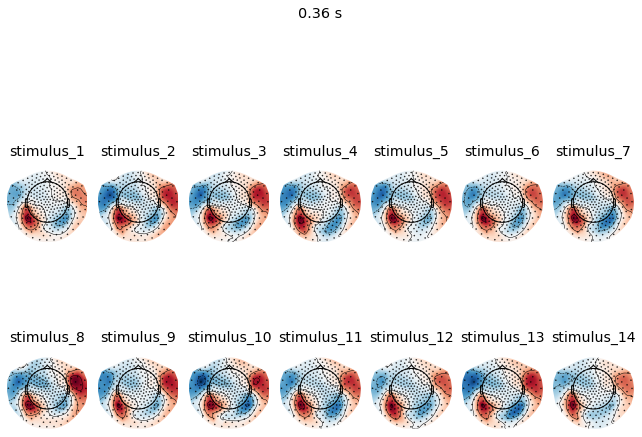

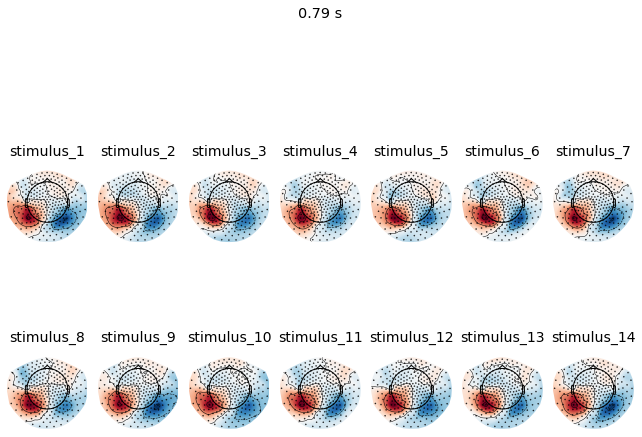

In [57]:
for t in[-0.5,0,0.36,0.79]:
    fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(9, 8),
                            subplot_kw={'xticks': [], 'yticks': []})
    for ax, st in zip(axs.flat, sti):
        exec('evo = evoked_{}.copy()'.format(st))
        evo.plot_topomap(t, extrapolate='local',colorbar = False, res=1000, contours=4,size=2,show=False,axes=ax,title ='{} s'.format(t))
        ax.set_title('stimulus_{}'.format(st),fontsize=14)
    plt.tight_layout()
    plt.savefig('data/topomap/topomap-{}.png'.format(t), dpi=1000)
    plt.show()   

Removing 5 compensators from info because not all compensation channels were picked.


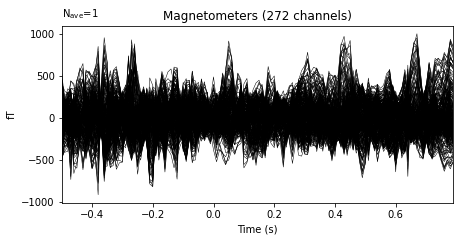

Removing 5 compensators from info because not all compensation channels were picked.


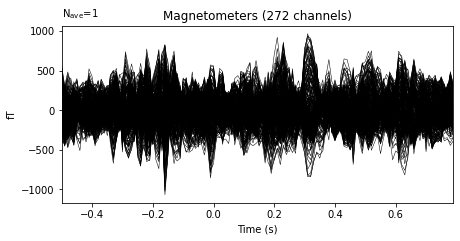

Removing 5 compensators from info because not all compensation channels were picked.


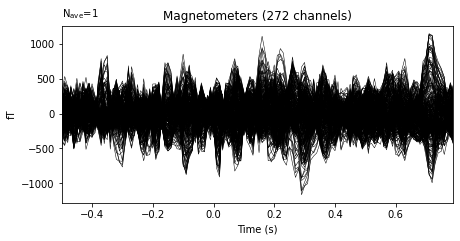

Removing 5 compensators from info because not all compensation channels were picked.


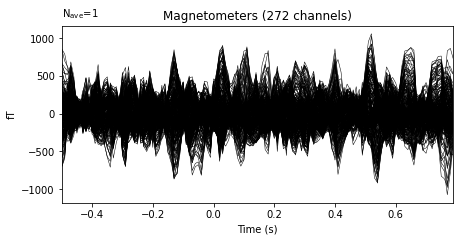

Removing 5 compensators from info because not all compensation channels were picked.


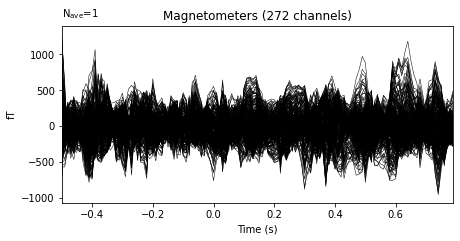

Removing 5 compensators from info because not all compensation channels were picked.


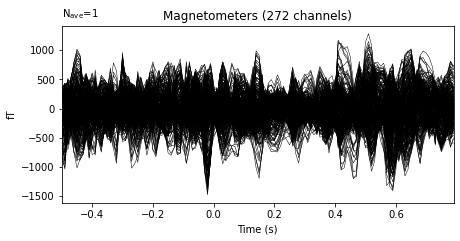

In [7]:
availabe_event = [1, 2, 3, 4, 5, 32]
for i in availabe_event:
    evoked_i = epochs[i].average(picks=picks)
    epochs_i = epochs[i]
    evoked_i.plot(time_unit='s')
    plt.show()